In [1]:
%matplotlib inline

In [3]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)
np.random.seed

<function RandomState.seed>

In [5]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
e

array([-0.02133065,  0.72294685,  0.78878892,  1.80125439, -0.29653617,
        0.72030046,  0.36461901, -0.79492558, -0.29780149,  0.45911125,
        0.12691258, -0.37303444,  0.44267983,  0.02966124,  0.94288908,
       -0.21339695,  0.10913707, -0.88374171,  0.84784613, -1.57843823,
        0.69765956, -2.45733254,  2.11128891, -1.19762856,  0.14385429,
        0.99117006, -1.26458558,  1.00722524,  1.5456179 , -0.88545487,
       -1.30827221,  0.93462099, -1.14902132,  2.37279208, -0.37782534,
        0.3612157 , -0.23053922, -1.35262497,  0.21398518, -0.54340682,
        0.75024152,  1.09332836,  0.01237105, -0.93758387, -0.36110813,
        0.74369469, -0.14670648, -0.69744922,  1.29446466,  0.4779761 ,
       -0.71776665,  0.09665539,  1.02756553, -0.83940571,  0.74676692,
        0.26208469,  0.61818826,  1.36612266, -1.30756545, -1.43303462,
        0.08554492,  0.40730973, -1.35951172, -0.28515036,  0.43463344,
        1.26406316,  0.58753075,  1.2122332 ,  0.62616465, -0.73

In [6]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [7]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [8]:
y

array([9.78669345e-01, 1.83507827e+00, 2.21711256e+00, 3.74983106e+00,
       2.37635435e+00, 4.32156564e+00, 5.09831965e+00, 5.27527134e+00,
       7.31295252e+00, 9.81448316e+00, 1.14309632e+01, 1.30837557e+01,
       1.62562703e+01, 1.84041128e+01, 2.20822626e+01, 2.38949593e+01,
       2.73905369e+01, 2.97747625e+01, 3.50875156e+01, 3.64464572e+01,
       4.27118418e+01, 4.37501973e+01, 5.27162272e+01, 5.40087789e+01,
       6.01557919e+01, 6.60126985e+01, 6.89705945e+01, 7.66601178e+01,
       8.28202838e+01, 8.62150451e+01, 9.18221227e+01, 1.00298972e+02,
       1.04653346e+02, 1.14817237e+02, 1.18912757e+02, 1.26701997e+02,
       1.33364502e+02, 1.39700737e+02, 1.48929728e+02, 1.56038779e+02,
       1.65402930e+02, 1.74020581e+02, 1.81418248e+02, 1.89150979e+02,
       1.98614201e+02, 2.08809810e+02, 2.17214277e+02, 2.26162463e+02,
       2.37857366e+02, 2.46947928e+02, 2.55863297e+02, 2.66992890e+02,
       2.78443033e+02, 2.87299356e+02, 2.99812883e+02, 3.10459616e+02,
      

In [9]:
print(x, y)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [10]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.083e+06
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          3.25e-244
Time:                        11:26:08   Log-Likelihood:                -134.79
No. Observations:                 100   AIC:                             275.6
Df Residuals:                      97   BIC:                             283.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1876      0.278      4.270      0.0

In [11]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.1875799   0.06751355 10.00087227]
R2:  0.9999904584846492


In [14]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
y

array([ 4.14299754,  5.47997971,  5.49635809,  6.00134196,  6.46009008,
        5.73182648,  6.25422651,  6.81623669,  5.78991882,  6.35199159,
        5.88844406,  6.40734029,  7.51308087,  7.95023084,  7.37470646,
        8.06120492,  7.56449082,  8.77151177,  8.91061178,  9.69704557,
        9.42283172,  9.05953799,  9.74655014,  9.14203048,  8.89730433,
        9.51347665,  9.16943008,  8.36760714,  9.19860253,  9.90218113,
        9.70343065,  9.38005349, 10.53270376, 10.01640744, 10.88260005,
       10.13053463, 11.10216091, 11.35314861, 10.92519877, 11.28069654,
       10.94979986, 10.12044848, 11.51546499,  9.67924959, 10.44346466,
       11.06792384, 11.20988814, 11.03588851, 10.53427996, 11.1916786 ])

In [15]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     258.0
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           8.99e-29
Time:                        11:27:40   Log-Likelihood:                -32.701
No. Observations:                  50   AIC:                             73.40
Df Residuals:                      46   BIC:                             81.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4805      0.026     18.839      0.0

In [16]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.48048398  0.44944679 -0.01631824  4.99506578]
Standard errors:  [0.02550422 0.10026008 0.00223929 0.16537031]
Predicted values:  [ 4.58710986  5.02550852  5.42916004  5.77356995  6.04308373  6.23345874
  6.35256135  6.41907444  6.45942792  6.50345631  6.57949708  6.70973483
  6.90655644  7.17051594  7.4902435   7.84431344  8.20476442  8.5416934
  8.82816863  9.04465446  9.18222101  9.24401127  9.2447248   9.20820254
  9.16350988  9.14016129  9.16327112  9.24942747  9.40396674  9.62009691
  9.88001344 10.15782451 10.42380497 10.64928009 10.81133676 10.89658802
 10.90337251 10.84202746 10.73319024 10.60440778 10.48561062 10.40419546
 10.38052391 10.42457718 10.53431616 10.69601648 10.88652334 11.0770558
 11.23793542 11.34346231]


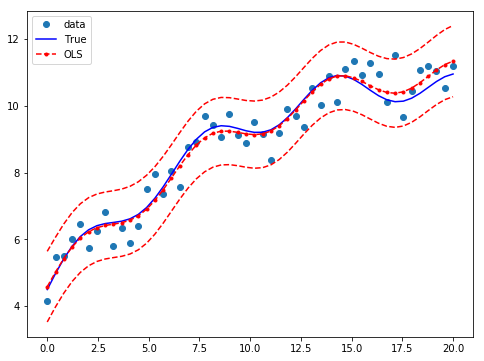

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [18]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e
y

array([ 9.66970383, 11.41315695, 11.98724245, 11.99975718, 10.11478344,
       13.39996394, 12.37273472, 13.8455077 , 13.98119566, 13.706232  ,
       15.35476773, 13.47401219, 14.37016908, 14.55843249, 17.04525036,
       15.52686475, 15.70573111, 16.47811097, 16.52708483, 16.63893823,
       22.35442218, 21.30454979, 22.4064379 , 22.94187874, 22.28028266,
       22.43704445, 24.07285937, 23.55681536, 23.98151855, 25.22442984,
       23.90050259, 24.34743505, 26.36549989, 25.95757351, 25.24589226,
       27.86217863, 28.36518706, 28.77273451, 28.51076406, 27.85729786,
       23.75670845, 23.72312517, 25.71428068, 25.19256826, 24.0518749 ,
       27.35654467, 24.7902873 , 27.59265036, 27.46407833, 27.6198948 ])

In [19]:
print(X[:5,:])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.66970383 11.41315695 11.98724245 11.99975718 10.11478344]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [20]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     749.2
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           4.86e-39
Time:                        11:30:12   Log-Likelihood:                -62.048
No. Observations:                  50   AIC:                             132.1
Df Residuals:                      46   BIC:                             139.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8885      0.057     15.619      0.0

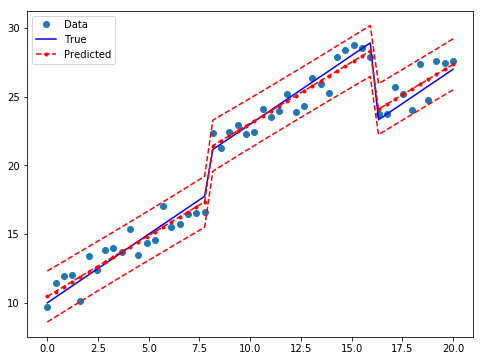

In [21]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

In [22]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[128.07362388]]), p=1.5790698731060541e-19, df_denom=46, df_num=2>


In [23]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[128.07362388]]), p=1.5790698731060341e-19, df_denom=46, df_num=2>


In [24]:
beta = [1., 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

print(res3.f_test(R))

<F test: F=array([[1.70934249]]), p=0.19227945460365012, df_denom=46, df_num=2>


In [25]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=array([[1.70934249]]), p=0.19227945460365012, df_denom=46, df_num=2>


In [27]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)
X

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,1.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,1.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,1.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,1.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,1.0,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,1.0,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,1.0,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,1.0,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,1.0,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


In [28]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           4.98e-10
Time:                        11:34:28   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [29]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

In [30]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.868936151135


In [31]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



In [32]:
infl = ols_results.get_influence()

In [33]:
2./len(X)**.5

0.5

In [34]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:729: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:758: RuntimeWarning: invalid value encountered in 